In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from numerize import numerize

In [2]:
# load the csv files
df1 = pd.read_csv('202105-divvy-tripdata.csv')
df2 = pd.read_csv('202106-divvy-tripdata.csv')
df3 = pd.read_csv('202107-divvy-tripdata.csv')
df4 = pd.read_csv('202108-divvy-tripdata.csv')
df5 = pd.read_csv('202109-divvy-tripdata.csv')
df6 = pd.read_csv('202110-divvy-tripdata.csv')
df7 = pd.read_csv('202111-divvy-tripdata.csv')
df8 = pd.read_csv('202112-divvy-tripdata.csv')
df9 = pd.read_csv('202201-divvy-tripdata.csv')
df10 = pd.read_csv('202202-divvy-tripdata.csv')
df11 = pd.read_csv('202203-divvy-tripdata.csv')
df12 = pd.read_csv('202204-divvy-tripdata.csv')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

In [3]:
# sort and clean the dataframe
df.sort_values(by=['started_at'], inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4615748 entries, 53011 to 12528
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 493.0+ MB


In [5]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,4.615748e+06,4.615748e+06,4.615748e+06,4.615748e+06
mean,4.190263e+01,-8.764360e+01,4.190291e+01,-8.764384e+01
std,4.049226e-02,2.422848e-02,4.061650e-02,2.357189e-02
min,4.164850e+01,-8.783325e+01,4.164850e+01,-8.783000e+01
25%,4.188209e+01,-8.765552e+01,4.188224e+01,-8.765650e+01
50%,4.189718e+01,-8.764090e+01,4.189766e+01,-8.764107e+01
75%,4.192628e+01,-8.762775e+01,4.192628e+01,-8.762775e+01
max,4.563503e+01,-7.379648e+01,4.216812e+01,-8.752452e+01


In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
53011,015AD83E58838178,classic_bike,2021-05-01 00:00:11,2021-05-01 00:12:28,LaSalle St & Illinois St,13430,Racine Ave & Randolph St,13155,41.890762,-87.631697,41.884069,-87.656853,member
455416,850563C43E02CBAC,classic_bike,2021-05-01 00:00:22,2021-05-01 00:04:00,Halsted St & Clybourn Ave,331,Larrabee St & Division St,KA1504000079,41.909668,-87.648128,41.903486,-87.643353,member
200498,20252EF674FE87AA,docked_bike,2021-05-01 00:00:31,2021-05-01 00:20:50,Racine Ave & Fullerton Ave,TA1306000026,Lake Shore Dr & North Blvd,LF-005,41.925563,-87.658404,41.911722,-87.626804,casual
357901,70F741E61F1342B5,classic_bike,2021-05-01 00:00:41,2021-05-01 00:10:32,Larrabee St & Menomonee St,TA1306000007,Halsted St & Wrightwood Ave,TA1309000061,41.914680,-87.643320,41.929143,-87.649077,casual
460761,5AF343214878AC95,docked_bike,2021-05-01 00:00:48,2021-05-01 02:39:53,Michigan Ave & Oak St,13042,Wentworth Ave & Cermak Rd,13075,41.900960,-87.623777,41.853085,-87.631931,casual


In [7]:
df['started_at'] = pd.to_datetime(df.started_at)
df['ended_at'] = pd.to_datetime(df.ended_at)

In [8]:
# count number of rides per user type
df_types = df['member_casual'].value_counts()
df_types

member    2599932
casual    2015816
Name: member_casual, dtype: int64

In [9]:
# calculate the trip time and make a new column
df['time'] = (pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])).dt.total_seconds()/60 
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time
53011,015AD83E58838178,classic_bike,2021-05-01 00:00:11,2021-05-01 00:12:28,LaSalle St & Illinois St,13430,Racine Ave & Randolph St,13155,41.890762,-87.631697,41.884069,-87.656853,member,12.283333
455416,850563C43E02CBAC,classic_bike,2021-05-01 00:00:22,2021-05-01 00:04:00,Halsted St & Clybourn Ave,331,Larrabee St & Division St,KA1504000079,41.909668,-87.648128,41.903486,-87.643353,member,3.633333
200498,20252EF674FE87AA,docked_bike,2021-05-01 00:00:31,2021-05-01 00:20:50,Racine Ave & Fullerton Ave,TA1306000026,Lake Shore Dr & North Blvd,LF-005,41.925563,-87.658404,41.911722,-87.626804,casual,20.316667
357901,70F741E61F1342B5,classic_bike,2021-05-01 00:00:41,2021-05-01 00:10:32,Larrabee St & Menomonee St,TA1306000007,Halsted St & Wrightwood Ave,TA1309000061,41.914680,-87.643320,41.929143,-87.649077,casual,9.850000
460761,5AF343214878AC95,docked_bike,2021-05-01 00:00:48,2021-05-01 02:39:53,Michigan Ave & Oak St,13042,Wentworth Ave & Cermak Rd,13075,41.900960,-87.623777,41.853085,-87.631931,casual,159.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150023,554DAA5387256E01,classic_bike,2022-04-30 23:58:30,2022-04-30 23:58:59,Orleans St & Chestnut St (NEXT Apts),620,Orleans St & Chestnut St (NEXT Apts),620,41.898203,-87.637536,41.898203,-87.637536,member,0.483333
208412,C41246F2C4F65308,classic_bike,2022-04-30 23:59:18,2022-05-01 00:20:53,Clark St & Armitage Ave,13146,Clark St & Wellington Ave,TA1307000136,41.918306,-87.636282,41.936497,-87.647539,casual,21.583333
142035,FCA7BD10C05FC4F9,electric_bike,2022-04-30 23:59:23,2022-05-01 00:18:28,Greenview Ave & Diversey Pkwy,13294,Ashland Ave & Division St,13061,41.932584,-87.665999,41.903450,-87.667747,casual,19.083333
125664,D50575DD96056AAF,electric_bike,2022-04-30 23:59:52,2022-05-01 00:09:50,Indiana Ave & Roosevelt Rd,SL-005,Indiana Ave & Roosevelt Rd,SL-005,41.867805,-87.623024,41.867888,-87.623041,casual,9.966667


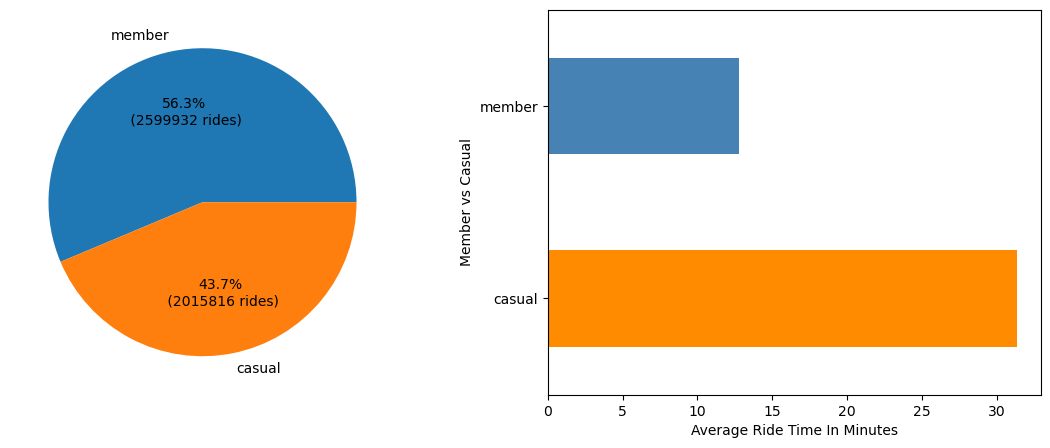

In [10]:
# compare ride numbers and average trip time by user type 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
axes[0].pie(df['member_casual'].value_counts(), labels=['member','casual'], autopct=lambda x: f'{x:.1f}%\n ({(x/100)*sum(df_types):.0f} rides)')
axes[1] = df.groupby(['member_casual'])['time'].mean().plot.barh(color=['darkorange','steelblue'])
axes[1].set_ylabel('Member vs Casual')
axes[1].set_xlabel('Average Ride Time In Minutes')
fig

In [11]:
# average ride duration (in minutes) by user type and day
df['day_of_week'] = df['started_at'].dt.day_name()
pivot = pd.pivot_table(df, values='time',index=['member_casual'],columns=['day_of_week'])
column_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot2 = pivot.reindex(column_order, axis=1)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time,day_of_week
53011,015AD83E58838178,classic_bike,2021-05-01 00:00:11,2021-05-01 00:12:28,LaSalle St & Illinois St,13430,Racine Ave & Randolph St,13155,41.890762,-87.631697,41.884069,-87.656853,member,12.283333,Saturday
455416,850563C43E02CBAC,classic_bike,2021-05-01 00:00:22,2021-05-01 00:04:00,Halsted St & Clybourn Ave,331,Larrabee St & Division St,KA1504000079,41.909668,-87.648128,41.903486,-87.643353,member,3.633333,Saturday
200498,20252EF674FE87AA,docked_bike,2021-05-01 00:00:31,2021-05-01 00:20:50,Racine Ave & Fullerton Ave,TA1306000026,Lake Shore Dr & North Blvd,LF-005,41.925563,-87.658404,41.911722,-87.626804,casual,20.316667,Saturday
357901,70F741E61F1342B5,classic_bike,2021-05-01 00:00:41,2021-05-01 00:10:32,Larrabee St & Menomonee St,TA1306000007,Halsted St & Wrightwood Ave,TA1309000061,41.914680,-87.643320,41.929143,-87.649077,casual,9.850000,Saturday
460761,5AF343214878AC95,docked_bike,2021-05-01 00:00:48,2021-05-01 02:39:53,Michigan Ave & Oak St,13042,Wentworth Ave & Cermak Rd,13075,41.900960,-87.623777,41.853085,-87.631931,casual,159.083333,Saturday


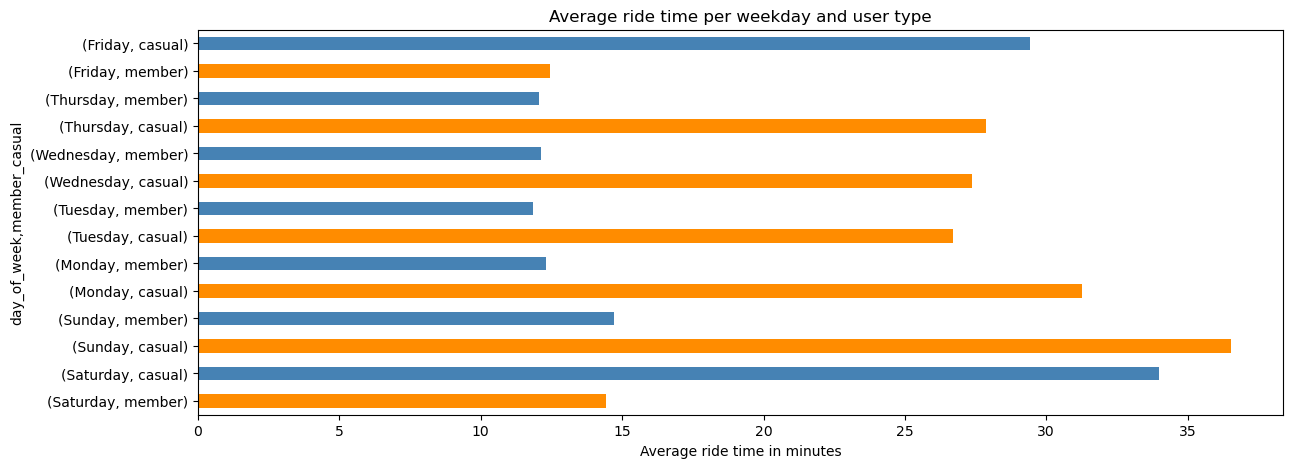

In [44]:
fig, ax = plt.subplots(figsize=(14, 5))
ax = df.groupby(['day_of_week', 'member_casual'],sort=False)['time'].mean().plot.barh(color=['darkorange','steelblue'])
ax.set_title('Average ride time per weekday and user type')
ax.set_xlabel('Average ride time in minutes')
ax.set_xlabel('Average ride time in minutes')
fig


In [13]:
# average ride duration (in minutes) by user type and hour
df['hour'] = df['started_at'].dt.strftime("%H:%M")
pivot3 = pd.pivot_table(df, values='time',index=['member_casual'],columns=['hour'])
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time,day_of_week,hour
53011,015AD83E58838178,classic_bike,2021-05-01 00:00:11,2021-05-01 00:12:28,LaSalle St & Illinois St,13430,Racine Ave & Randolph St,13155,41.890762,-87.631697,41.884069,-87.656853,member,12.283333,Saturday,00:00
455416,850563C43E02CBAC,classic_bike,2021-05-01 00:00:22,2021-05-01 00:04:00,Halsted St & Clybourn Ave,331,Larrabee St & Division St,KA1504000079,41.909668,-87.648128,41.903486,-87.643353,member,3.633333,Saturday,00:00
200498,20252EF674FE87AA,docked_bike,2021-05-01 00:00:31,2021-05-01 00:20:50,Racine Ave & Fullerton Ave,TA1306000026,Lake Shore Dr & North Blvd,LF-005,41.925563,-87.658404,41.911722,-87.626804,casual,20.316667,Saturday,00:00
357901,70F741E61F1342B5,classic_bike,2021-05-01 00:00:41,2021-05-01 00:10:32,Larrabee St & Menomonee St,TA1306000007,Halsted St & Wrightwood Ave,TA1309000061,41.914680,-87.643320,41.929143,-87.649077,casual,9.850000,Saturday,00:00
460761,5AF343214878AC95,docked_bike,2021-05-01 00:00:48,2021-05-01 02:39:53,Michigan Ave & Oak St,13042,Wentworth Ave & Cermak Rd,13075,41.900960,-87.623777,41.853085,-87.631931,casual,159.083333,Saturday,00:00


In [85]:
df2 = df.groupby(['member_casual', 'hour'])['hour'].count().unstack().T
df2.reset_index(inplace=True)
df2

member_casual,hour,casual,member
0,00:00,831,545
1,00:01,806,537
2,00:02,792,547
3,00:03,771,531
4,00:04,782,537
...,...,...,...
1435,23:55,835,496
1436,23:56,857,588
1437,23:57,829,598
1438,23:58,891,538


AttributeError: 'Line2D' object has no property 'rotation'